# High Order Taylor Maps I
(by Dario Izzo)

In this notebook we consider the system of differential equations $\dot{\mathbf y} = \mathbf f(\mathbf y)$:

$$
\begin{array}{l}
\dot r = v_r \\
\dot v_r = - \frac 1{r^2} + r v_\theta^2\\
\dot \theta = v_\theta \\
\dot v_\theta = -2 \frac{v_\theta v_r}{r}
\end{array}
$$

which describe, in non dimensional units, the Keplerian motion of a mass point object around some primary body. 
We show how we can build a high order Taylor map (HOTM, indicated with $\mathcal M$) representing the final state of the system at the time $T$ as a function of the initial conditions. 

In other words, we build a polinomial representation of the relation $\mathbf y(T) = \mathbf f(\mathbf y(0), T)$. Writing the initial conditions as $\mathbf y(0) = \overline {\mathbf y}(0) + \mathbf {dy}$, our HOTM will be written as:

$$
\mathbf y(T) = \mathcal M(\mathbf {dy})
$$

and will be valid in a neighbourhood of $\overline {\mathbf y}(0)$.

In [1]:
# We use numpy for arrays and pyaudi for the differential algebra machinery
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
from pyaudi import gdual_double as gdual
from pyaudi import sin, cos

In [2]:
# This is a simple Runga Kutta fourth order numerical integrator with fixed step.
# It is programmed to work both with floats and gduals. It infers the type from the initial conditions
def rk4(f, t0, y0, h, N):
    t = t0 + np.arange(N+1)*h
    y = np.array([[type(y0[0])] * np.size(y0)] * (N+1))
    y[0] = y0
    for n in range(N):
        xi1 = y[n]
        f1 = f(t[n], xi1)
        xi2 = y[n] + (h/2.)*f1
        f2 = f(t[n+1], xi2)
        xi3 = y[n] + (h/2.)*f2
        f3 = f(t[n+1], xi3)
        xi4 = y[n] + h*f3
        f4 = f(t[n+1], xi4)
        y[n+1] = y[n] + (h/6.)*(f1 + 2*f2 + 2*f3 + f4)
    return y

In [3]:
# The Equations of Motion of Keplerian motion in non dimensional spherical coordinates.
def eom_kep_polar(t,y):
    return np.array([y[1], - 1 / y[0] / y[0] + y[0] * y[3]*y[3], y[3], -2*y[3]*y[1]/y[0]])

### We perform the numerical integration using floats (the standard way)

In [4]:
# Fixed step size
step = 0.01
# Number of steps
n_steps = 500
# The initial conditions
ic = [1.,0.1,0.,1.]
# The intitial time (irrelevant as the system is autonomous)
it = 0.
y = rk4(eom_kep_polar, it, ic, step, n_steps)

Text(0,0.5,'y')

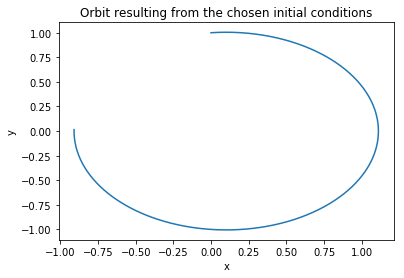

In [5]:
# Here we transform from polar to cartesian coordinates 
# to then plot
cx = [it[0]*np.sin(it[2]) for it in y]
cy = [it[0]*np.cos(it[2]) for it in y]
plt.plot(cx,cy)
plt.title("Orbit resulting from the chosen initial conditions")
plt.xlabel("x")
plt.ylabel("y")

### We perform the numerical integration using gduals (to get a HOTM)

In [6]:
# Order of the Taylor Map. If we have 4 variables the number of terms in the Taylor expansion in 329  at order 7 
order = 5
# We now define the initial conditions as gdual (not float)
ic_g = [gdual(ic[0], "r", order), gdual(ic[1], "vr", order), gdual(ic[2], "t", order), gdual(ic[3], "vt", order)]

In [7]:
import time
start_time = time.time()
# We call the numerical integrator, this time it will compute on gduals
y = rk4(eom_kep_polar, it, ic_g, step, n_steps)
print("--- %s seconds ---" % (time.time() - start_time))


--- 1.7251091003417969 seconds ---


In [8]:
# We extract the last point
yf = y[-1]
# And unpack it into some convinient names
rf,vrf,tf,vtf = yf
# We compute the final cartesian components
xf = rf * sin(tf)
yf = rf * cos(tf)
# Note that you can get the latex representation of the gdual
print(xf._repr_latex_())
print("xf (latex):")
xf

\[ 456.247{dvt}^{3}-0.00244413{dt}^{3}+32.5178{dr}{dt}^{3}{dvt}+9.72205{dr}{dt}^{3}{dvr}-98350.9{dr}^{2}{dvr}^{3}+95097.4{dr}^{3}{dt}{dvt}+3.44559{dt}^{3}{dvt}-14318.7{dvt}^{4}+680.557{dr}{dvt}+3059.27{dr}{dt}{dvr}{dvt}-501710{dr}{dvt}^{4}-2.01229{dvt}-4.00992{dr}-58.3323{dr}{dt}{dvr}+2119.32{dr}^{2}{dvr}-1040.11{dvr}^{2}{dvt}^{2}-93373.3{dr}^{2}{dvr}{dvt}-61205.4{dr}^{3}{dvr}-185943{dr}^{4}+1.00615{dt}^{2}{dvt}+\ldots+\mathcal{O}\left(6\right) \]
xf (latex):


456.247*dvt**3-0.00244413*dt**3+32.5178*dr*dt**3*dvt+9.72205*dr*dt**3*dvr-98350.9*dr**2*dvr**3+95097.4*dr**3*dt*dvt+3.44559*dt**3*dvt-14318.7*dvt**4+680.557*dr*dvt+3059.27*dr*dt*dvr*dvt-501710*dr*dvt**4-2.01229*dvt-4.00992*dr-58.3323*dr*dt*dvr+2119.32*dr**2*dvr-1040.11*dvr**2*dvt**2-93373.3*dr**2*dvr*dvt-61205.4*dr**3*dvr-185943*dr**4+1.00615*dt**2*dvt+...

In [9]:
# We can extract the value of the polinomial when $\mathbf {dy} = 0$
print("Final x from the gdual integration", xf.constant_cf)
print("Final y from the gdual integration", yf.constant_cf)
# And check its indeed the result of the 'reference' trajectory (the lineariation point)
print("\nFinal x from the float integration", cx[-1])
print("Final y from the float integration", cy[-1])

Final x from the gdual integration -0.9089833754123715
Final y from the gdual integration 0.014664786455128188

Final x from the float integration -0.9089833754123692
Final y from the float integration 0.014664786455132996


### We visualize the HOTM

In [10]:
# Let us now visualize the Taylor map by creating a grid of perturbations on the initial conditions and
# evaluating the map for those values
Npoints = 10 # 10000 points
epsilon = 1e-3
grid = np.arange(-epsilon,epsilon,2*epsilon/Npoints)
nxf = [0] * len(grid)**4
nyf = [0] * len(grid)**4
i=0
import time
start_time = time.time()
for dr in grid:
    for dt in grid:
        for dvr in grid:
            for dvt in grid:
                nxf[i] = xf.evaluate({"dr":dr, "dt":dt, "dvr":dvr,"dvt":dvt})
                nyf[i] = yf.evaluate({"dr":dr, "dt":dt, "dvr":dvr,"dvt":dvt})
                i = i+1
print("--- %s seconds ---" % (time.time() - start_time))

--- 0.34252142906188965 seconds ---


Text(0.5,1,'Stretch')

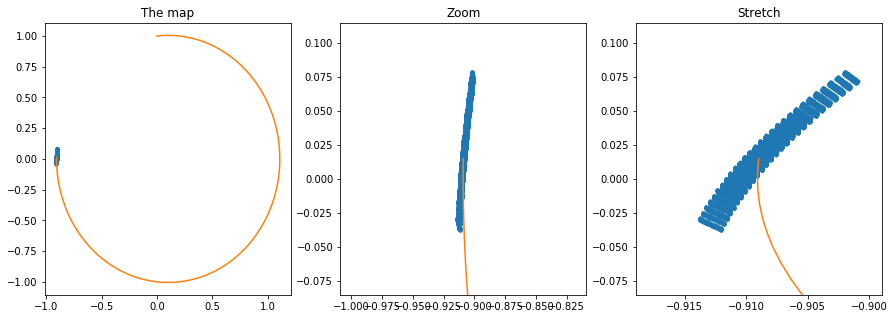

In [11]:
f, axarr = plt.subplots(1,3,figsize=(15,5))
# Normal plot of the final map
axarr[0].plot(nxf,nyf,'.')
axarr[0].plot(cx,cy)
axarr[0].set_title("The map")

# Zoomed plot of the final map (equal axis)
axarr[1].plot(nxf,nyf,'.')
axarr[1].plot(cx,cy)
axarr[1].set_xlim([cx[-1] - 0.1, cx[-1] + 0.1])
axarr[1].set_ylim([cy[-1] - 0.1, cy[-1] + 0.1])
axarr[1].set_title("Zoom")

# Zoomed plot of the final map (unequal axis)
axarr[2].plot(nxf,nyf,'.')
axarr[2].plot(cx,cy)
axarr[2].set_xlim([cx[-1] - 0.01, cx[-1] + 0.01])
axarr[2].set_ylim([cy[-1] - 0.1, cy[-1] + 0.1])
axarr[2].set_title("Stretch")
#axarr[1].set_xlim([cx[-1] - 0.1, cx[-1] + 0.1])
#axarr[1].set_ylim([cy[-1] - 0.1, cy[-1] + 0.1])


### How much faster is now to evaluate the Map rather than perform a new numerical integration?


In [12]:
# First we profile the method evaluate (note that you need to call the method 4 times to get the full state)

In [13]:
timeit xf.evaluate({"dr":epsilon, "dt":epsilon, "dvr":epsilon,"dvt":epsilon})

11.8 µs ± 469 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [14]:
# Then we profile the Runge-Kutta 4 integrator

In [15]:
timeit rk4(eom_kep_polar, 0, [it + epsilon for it in ic], step, n_steps)

15.7 ms ± 1.97 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


Text(0,0.5,'Error in estimating the final state (x)')

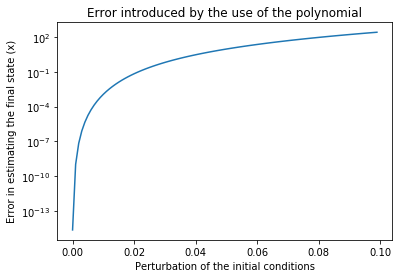

In [16]:
# It seems the speedup is 2-3 orders of magnitude, but did we loose precision?
# We plot the error in the final result as computed by the HOTM and by the Runge-Kutta
# as a function of the distance from the original initial conditions
out = []
pert = np.arange(0,0.1,1e-3)
for epsilon in pert:
    res_map_xf = xf.evaluate({"dr":epsilon, "dt":epsilon, "dvr":epsilon,"dvt":epsilon})
    res_int = rk4(eom_kep_polar, 0, [it + epsilon for it in ic], step, n_steps)
    res_int_x = [it[0]*np.sin(it[2]) for it in res_int]
    res_int_xf = res_int_x[-1]
    out.append(np.abs(res_map_xf - res_int_xf))
plt.semilogy(pert,out)
plt.title("Error introduced by the use of the polynomial")
plt.xlabel("Perturbation of the initial conditions")
plt.ylabel("Error in estimating the final state (x)")